# Choose tutors

## Choose proper tutors for math exam

https://www.kaggle.com/c/choose-tutors

#### Description

In this competition your task will be to predict if a tutor is a proper one for preparing for the math exam. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

#### Evaluation

The evaluation metric is ROC AUC

In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set()
sns.set_palette('husl')

import random

import warnings
warnings.simplefilter('ignore')

In [2]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'family': 'Calibri'}
label_dict = {'fontsize': '14', 'family': 'Calibri'}

#### Data downloading

In [3]:
TRAIN_DATASET_PATH = 'train (1).csv'
TEST_DATASET_PATH = 'test (1).csv'

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

## Data overview

In [5]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


#### Features Overview

In [8]:
TARGET_NAME = 'choose'
df_train[TARGET_NAME].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [9]:
FEATURES = df_train.columns.drop(TARGET_NAME).drop('Id')

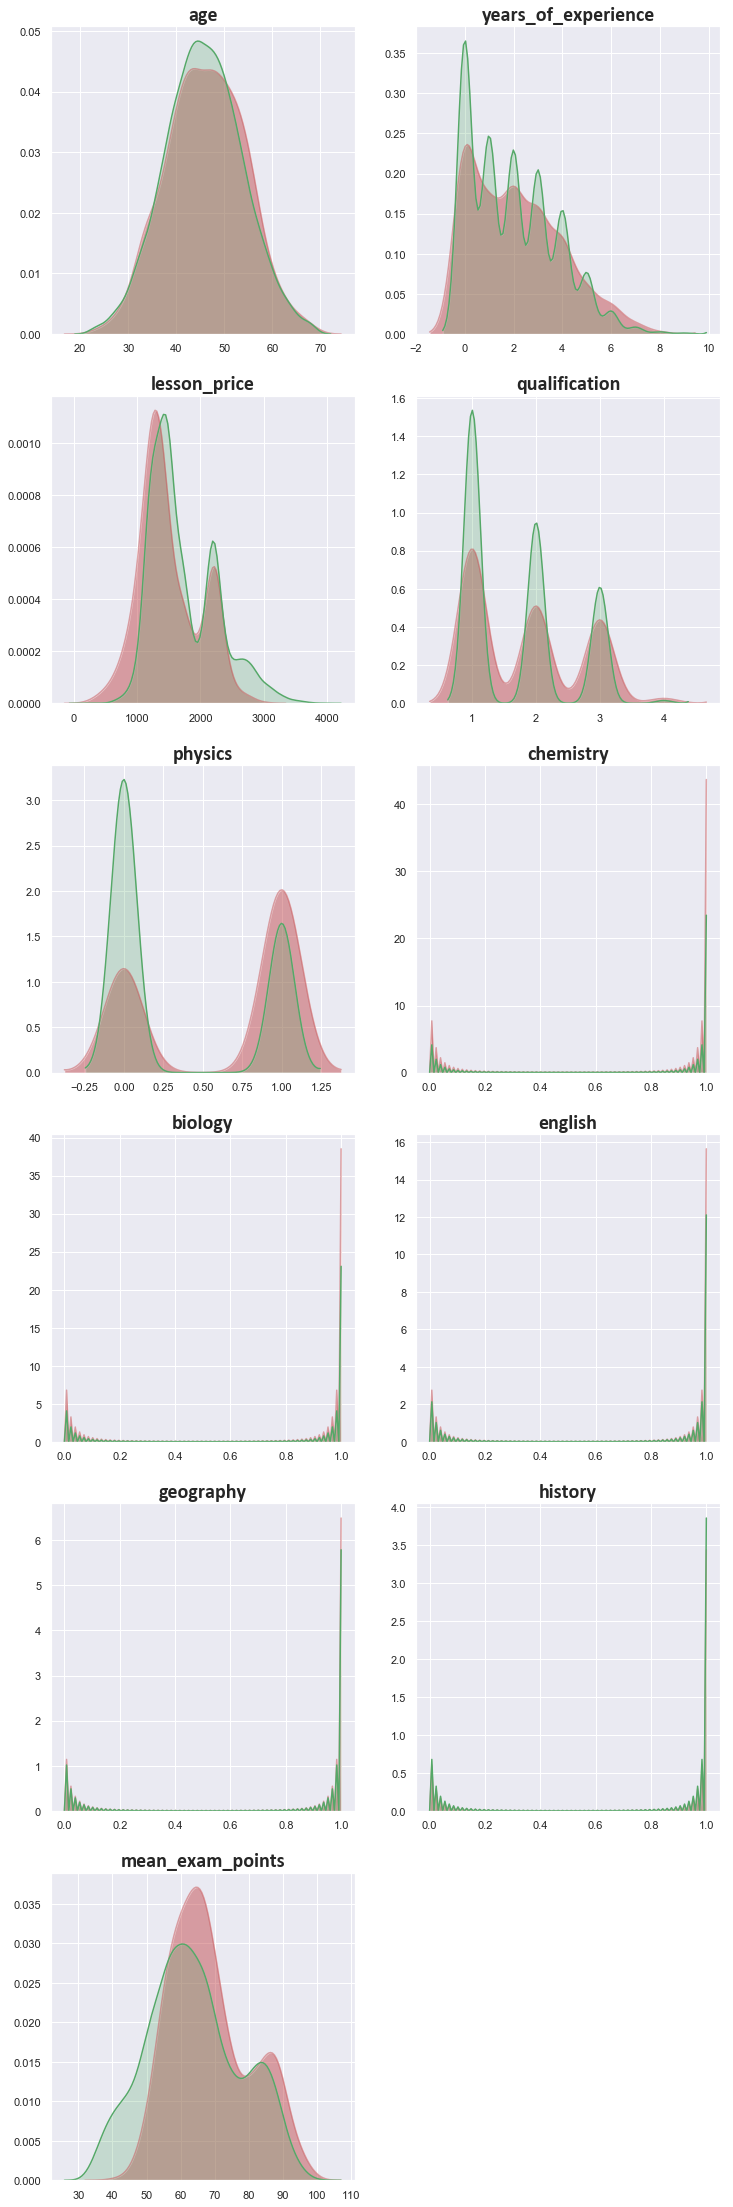

In [10]:
plt.figure(figsize=(12, 60))

for i, colname in enumerate(FEATURES):
    plt.subplot(9, 2, i+1)
    plt.title(colname, fontdict=title_dict)
    sns.kdeplot(df_train.loc[df_train[TARGET_NAME] == 1, colname], shade=True, alpha=0.5, legend=False, color='r')
    sns.kdeplot(df_train.loc[df_train[TARGET_NAME] == 0, colname], shade=True, legend=False, color='g')
    

## Numpy arrays

In [11]:
X = np.array(df_train.drop(columns=TARGET_NAME).drop(columns='Id'))
y = np.array(df_train[TARGET_NAME])

In [12]:
X[:5], X.shape

(array([[3.50e+01, 0.00e+00, 2.15e+03, 2.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 7.40e+01],
        [5.20e+01, 2.00e+00, 1.25e+03, 2.00e+00, 1.00e+00, 0.00e+00,
         1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 5.70e+01],
        [2.90e+01, 3.00e+00, 1.75e+03, 1.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.60e+01],
        [3.30e+01, 3.00e+00, 1.05e+03, 1.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.60e+01],
        [4.60e+01, 3.00e+00, 2.25e+03, 2.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 7.30e+01]]), (10000, 11))

In [13]:
y[:5], y.shape

(array([0, 1, 0, 1, 0], dtype=int64), (10000,))

In [14]:
test = np.array(df_test.drop(columns='Id'))
test[:5], test.shape

(array([[3.20e+01, 2.00e+00, 2.70e+03, 3.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 9.00e+01],
        [3.50e+01, 6.00e+00, 1.80e+03, 2.00e+00, 1.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 7.10e+01],
        [4.40e+01, 2.00e+00, 1.20e+03, 1.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 4.50e+01],
        [4.40e+01, 4.00e+00, 2.95e+03, 3.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 9.20e+01],
        [3.80e+01, 3.00e+00, 1.40e+03, 2.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 5.80e+01]]), (10000, 11))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 5
)

## Decision Tree

In [16]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

In [17]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        classes = {0: 0, 1: 0}
        for label in self.labels:
            if label in classes:
                classes[label] += 1
        prediction = max(classes, key=classes.get)
        
        pred_proba = []
        for label in classes:
            p = classes[label] / len(self.labels)
            pred_proba.append(p)
        
        return prediction, pred_proba  

In [18]:
# Расчет энтропии Шеннона

def calc_entropy(labels):
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    impurity = 0
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p * np.log2(p)
        
    return impurity

In [19]:
def quality(left_labels, right_labels, current_entropy):

    # доля выбоки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_entropy - p * calc_entropy(left_labels) - (1 - p) * calc_entropy(right_labels)

In [20]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [21]:
def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_entropy = calc_entropy(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_entropy)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [22]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [23]:
def classify_object(obj, node):
    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer, pred_proba = node.prediction
        return answer, pred_proba

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [24]:
def predict(data, tree):
    
    classes = []
    probability = []
    for obj in data:
        prediction, pred_proba = classify_object(obj, tree)
        classes.append(prediction)
        probability.append(pred_proba)
    probability = np.array(probability)
    classes = np.array(classes)
    return classes, probability

In [25]:
%%time

my_tree = build_tree(X_train, y_train)

Wall time: 7min 39s


In [26]:
train_classes, train_probability = predict(X_train, my_tree)

In [27]:
test_classes, test_probability = predict(X_test, my_tree)

## Random Forest

In [28]:
def get_bootstrap(data, labels, N):
    
    random.seed(5)
    n_samples = int(data.shape[0] * 0.9)
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [29]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(len_sample / 2)
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [30]:
def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 3

    current_entropy = calc_entropy(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_entropy)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [31]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [32]:
def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    pred_proba = []
    for tree in forest:
        classes, probability = predict(data, tree)
        predictions.append(classes)
        pred_proba.append(probability)
        
    predictions_per_object = list(zip(*predictions))
    proba_per_object = list(zip(*pred_proba))
    
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
    
    voted_proba = []
    for obj in proba_per_object:
        sum_proba_of_1 = 0
        for p in obj:
            sum_proba_of_1 += p[1]
        voted_proba.append(sum_proba_of_1 / len(obj))
        
    voted_predictions = np.array(voted_predictions)
    voted_proba = np.array(voted_proba)
        
    return voted_predictions, voted_proba

In [33]:
%%time
n_trees = 120
my_forest = random_forest(X_train, y_train, n_trees)

Wall time: 12h 2min 35s


In [34]:
trian_voted_predictions, train_voted_proba = tree_vote(my_forest, X_train)

In [35]:
test_voted_predictions, test_voted_proba = tree_vote(my_forest, X_test)

## Gradient Boosting

In [ ]:
def gb_predict(X, trees_list, coef_list, eta):
    
    return [sum([eta* coef * predict([x], alg)[0] 
                          for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X]

In [ ]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [ ]:
def bias(y, z):
    return (y - z)

#### Gradient boosting relies on regression trees (even when solving a classification problem)

### Decision Tree

In [ ]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

In [ ]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        preds = []
        for label in self.labels:
            preds.append(label)
        preds = np.array(preds)    
        prediction = np.mean(preds)
        return prediction        

In [ ]:
def dispersion_(labels):
    objects = []
        
    for label in labels:
        objects.append(label)
        
    objects = np.array(objects)    
    pred = objects.mean()
    return np.mean((labels - pred) ** 2)

In [ ]:
def quality(left_labels, right_labels, current_dispersion_):

    # доля выбоки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion_ - p * dispersion_(left_labels) - (1 - p) * dispersion_(right_labels)

In [ ]:
def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [ ]:
def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_dispersion_ = dispersion_(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_dispersion_)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    
    return Node(index, t, true_branch, false_branch)

In [ ]:
def regression(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return regression(obj, node.true_branch)
    else:
        return regression(obj, node.false_branch)

In [ ]:
def predict(data, tree):
    
    predictions = []
    for obj in data:
        prediction = regression(obj, tree)
        predictions.append(prediction)
    return predictions

In [ ]:
def gb_fit(n_trees, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [ ]:
%%time

# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, X_train, X_test, y_train, y_test, coefs, eta)

In [ ]:
y_pred_train = gb_predict(X_train, trees, coefs, eta)
y_pred_test = gb_predict(X_test, trees, coefs, eta)

## Prediction on Test

In [36]:
test_voted_predictions, test_voted_proba = tree_vote(my_forest, test)

In [37]:
df_test[TARGET_NAME] = test_voted_proba

In [38]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.064960
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,0.247028
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.000000
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,0.000000
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0.168937


In [39]:
PRED_PATH = 'ATaganova_predictions.csv'
df_test.loc[:, ['Id', TARGET_NAME]].to_csv(PRED_PATH, index=False, encoding='utf-8')